In [1]:
import pandas as pd
import numpy as np
from typing import Optional, List, Callable, Any, Union, Dict
from itertools import product
from statistics import mean
from pathlib import Path
import gzip
import os

### Read datasets - Given code
Use the gzip function is files ar gzipped

In [2]:
def read_ds_gzip(path: Optional[Path]=None, ds: str = "TRAIN") -> pd.DataFrame:
    """Args:
        path (Optional[Path], optional): the path to read the dataset file. Defaults to /kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz.
        ds (str, optional): the part to read (TRAIN or TEST), to use when path is None. Defaults to "TRAIN".

    Returns:
        pd.DataFrame:
    """
    with gzip.open(f'/kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz' if path is None else path) as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["battleneturl", "played_race"] if "TRAIN" in ds else ["played_race"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

def read_ds(path: Optional[Path]=None, ds: str = "TRAIN"):
    """Args:
        path (Optional[Path], optional): the path to read the dataset file. Defaults to /kaggle/input/the-insa-starcraft-2-player-prediction-challenge/{ds}.CSV.gz.
        ds (str, optional): the part to read (TRAIN or TEST), to use when path is None. Defaults to "TRAIN".

    Returns:
        pd.DataFrame:
    """
    with open(f'/kaggle/input/train-sc2-keystrokes/{ds}.CSV' if path is None else path) as f:
        max_actions = max(( len( str(c).split(",")) for c in f.readlines() ))
        f.seek(0)
        _names = ["battleneturl", "played_race"] if "TRAIN" in ds else ["played_race"]
        _names.extend(range(max_actions - len(_names)))
        return pd.read_csv(f, names=_names, dtype= str)

### Explore data

In [3]:
# Read train csv file
features_train = read_ds_gzip(Path(os.path.abspath('')) / "./TRAIN.CSV.GZ")
features_train.shape, features_train.head()

# Some Statistics
print(features_train.info())  # Affiche des informations sur le DataFrame
print(features_train.describe())  # Fournit des statistiques descriptives

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Columns: 10539 entries, battleneturl to 10536
dtypes: object(10539)
memory usage: 245.4+ MB
None
                                             battleneturl played_race     0  \
count                                                3052        3052  3044   
unique                                                200           3     4   
top     http://kr.battle.net/sc2/en/profile/2348639/1/...     Protoss     s   
freq                                                   58        1210  1839   

           1     2     3     4     5     6     7  ...     10527     10528  \
count   3044  3044  3044  3044  3044  3043  3042  ...         1         1   
unique    10    17    22    28    27    29    32  ...         1         1   
top        s     s     s     s     s     s     s  ...  hotkey22  hotkey12   
freq    2757  2569  1770  1610  1174  1046   888  ...         1         1   

           10529     10530     10531     10532 

In [4]:
# Read test csv file
features_test = read_ds_gzip(Path(os.path.abspath('')) / "./TEST.CSV.GZ", "TEST")
print(features_test.shape) 
print(features_test.head())
print("----------------------------------------------------------------------")
print(features_test.info())
print("----------------------------------------------------------------------")
print(features_test.describe())

(340, 6818)
  played_race     0         1         2         3         4         5  \
0        Zerg     s         s         s  hotkey10         s  hotkey60   
1      Terran     s  hotkey30  hotkey00        t5         s  hotkey32   
2     Protoss  Base         s         s      Base         s  hotkey20   
3        Zerg     s         s         s         s  hotkey20         s   
4     Protoss  Base         s         s      Base         s  hotkey50   

          6         7         8  ... 6807 6808 6809 6810 6811 6812 6813 6814  \
0         s  hotkey00         s  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1         s  hotkey32         s  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  hotkey30  hotkey60  hotkey40  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  hotkey40        t5       t10  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  hotkey30        t5  hotkey40  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

  6815 6816  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  
3  NaN  NaN 

In [5]:
# 1 row left, so there are at least one column empty for each row, players didn't finish at the same time
df1 = features_train.dropna()
features_train.shape, df1.shape

((3052, 10539), (1, 10539))

### Players nb parties repartition

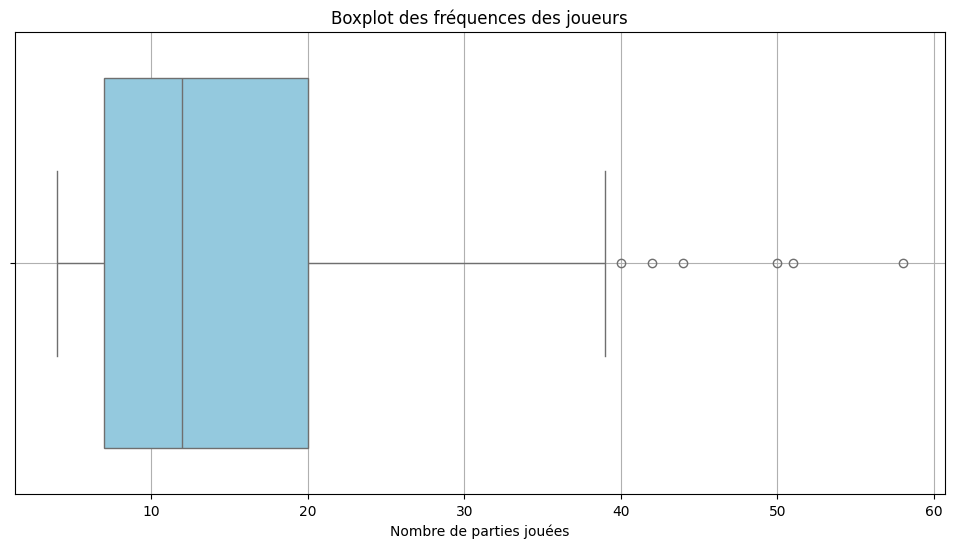

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la fréquence des joueurs
player_counts = features_train['battleneturl'].value_counts()

# Création du boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=player_counts, orient='h', color='skyblue')

# Ajout de labels et titre
plt.xlabel("Nombre de parties jouées")
plt.title("Boxplot des fréquences des joueurs")
plt.grid(True)

# Affichage du graphique
plt.show()

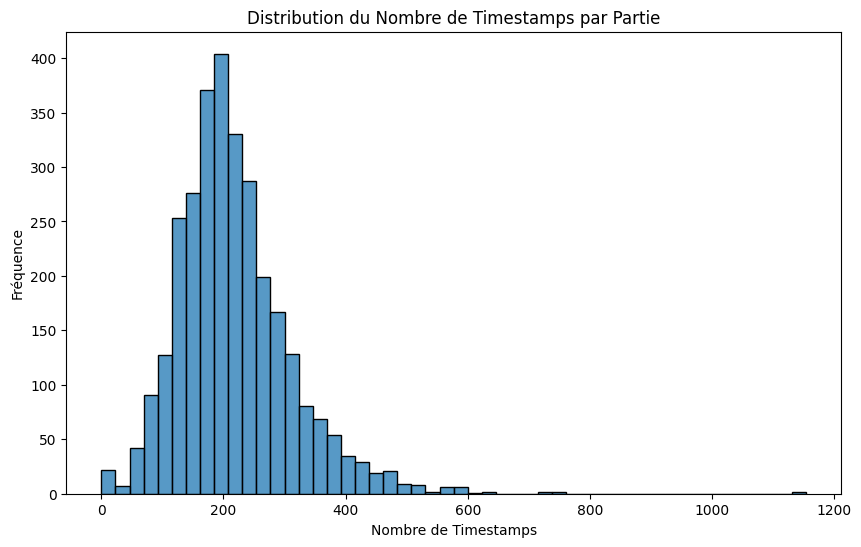


Statistiques du nombre de timestamps:
count    3052.000000
mean      217.692661
std        95.167388
min         0.000000
25%       157.000000
50%       204.000000
75%       262.000000
max      1154.000000
dtype: float64


In [7]:
## Distribution du nombre de timestamps par joueurs

import matplotlib.pyplot as plt
import seaborn as sns

# Compte le nombre de timestamps par ligne
timestamp_counts = features_train.apply(
    lambda row: sum(1 for x in row if isinstance(x, str) and x.startswith('t')), 
    axis=1
)

# Crée le graphique de distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=timestamp_counts, bins=50)
plt.title('Distribution du Nombre de Timestamps par Partie')
plt.xlabel('Nombre de Timestamps')
plt.ylabel('Fréquence')
plt.show()

# Affiche les statistiques récapitulatives
print("\nStatistiques du nombre de timestamps:")
print(timestamp_counts.describe())

### Timestamps values distribution

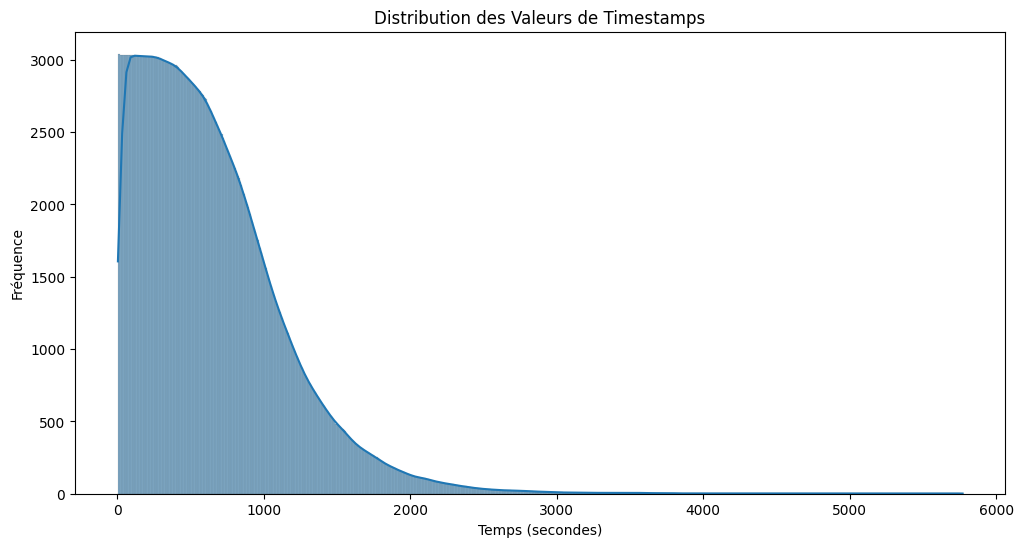


Statistiques des valeurs de timestamps:
count    664398.000000
mean        650.706956
std         502.615702
min           5.000000
25%         275.000000
50%         560.000000
75%         905.000000
max        5770.000000
dtype: float64


In [8]:
## Distribution des timestamps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire tous les timestamps
all_timestamps = []
for _, row in features_train.iterrows():
    timestamps = [int(x[1:]) for x in row if isinstance(x, str) and x.startswith('t') and x[1:].isdigit()]
    all_timestamps.extend(timestamps)

# Convertir en Series pandas pour faciliter l'analyse
timestamp_series = pd.Series(all_timestamps)
max_times = timestamp_series.max()
bin_edges = np.arange(0, max_times + 5, 5)

# Créer le graphique de distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=timestamp_series, bins=bin_edges, kde=True)
plt.title('Distribution des Valeurs de Timestamps')
plt.xlabel('Temps (secondes)')
plt.ylabel('Fréquence')
plt.show()

# Afficher les statistiques récapitulatives
print("\nStatistiques des valeurs de timestamps:")
print(timestamp_series.describe())

In [9]:
# Calculer les périodes entre chaque paire de timestamps

# Supprimer les doublons
unique_timestamps = timestamp_series.drop_duplicates()
if len(unique_timestamps) > 1:
    # Trier les timestamps pour s'assurer que nous calculons les distances correctement
    sorted_timestamps = unique_timestamps.sort_values()
    periods = sorted_timestamps.diff().dropna()  # Calcule la différence entre chaque timestamp consécutif
else:
    periods = pd.Series([])

# Afficher les périodes
print("Périodes entre chaque paire de timestamps :")
print(periods)

# Afficher la période moyenne entre les timestamps
if not periods.empty:
    average_period = periods.mean()
    print(f"\nPériode moyenne entre les timestamps : {average_period:.2f} secondes")
else:
    print("\nAucune période à afficher.")

Périodes entre chaque paire de timestamps :
1         5.0
2         5.0
3         5.0
4         5.0
5         5.0
         ... 
138670    5.0
138671    5.0
138672    5.0
138673    5.0
138674    5.0
Length: 1153, dtype: float64

Période moyenne entre les timestamps : 5.00 secondes


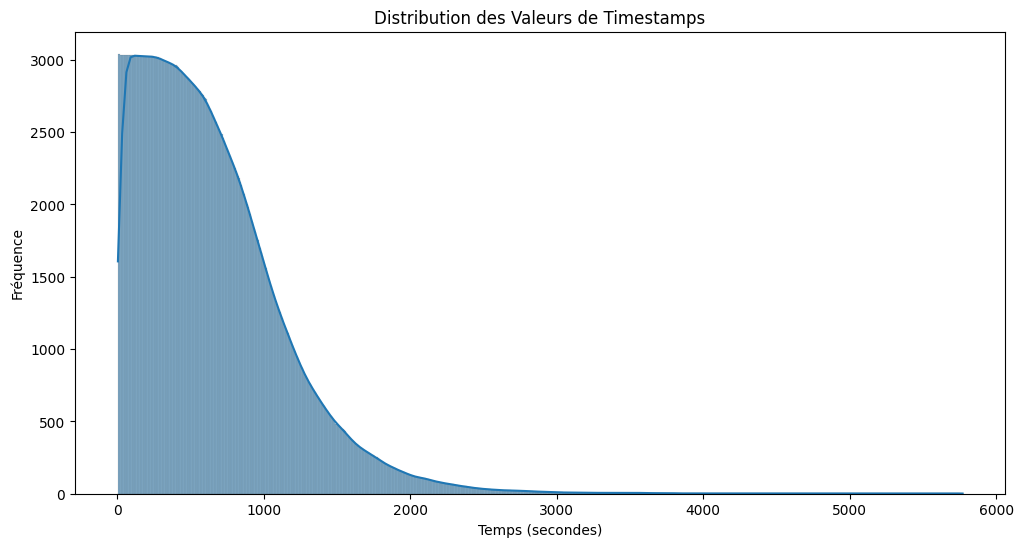


Statistiques des valeurs de timestamps:
count    664398.000000
mean        650.706956
std         502.615702
min           5.000000
25%         275.000000
50%         560.000000
75%         905.000000
max        5770.000000
dtype: float64


In [10]:
## Distribution des timestamps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraire tous les timestamps
all_timestamps = []
for _, row in features_train.iterrows():
    timestamps = [int(x[1:]) for x in row if isinstance(x, str) and x.startswith('t') and x[1:].isdigit()]
    all_timestamps.extend(timestamps)

# Convertir en Series pandas pour faciliter l'analyse
timestamp_series = pd.Series(all_timestamps)
max_times = timestamp_series.max()
bin_edges = np.arange(0, max_times + 5, 5)

# Créer le graphique de distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=timestamp_series, bins=bin_edges, kde=True)
plt.title('Distribution des Valeurs de Timestamps')
plt.xlabel('Temps (secondes)')
plt.ylabel('Fréquence')
plt.show()

# Afficher les statistiques récapitulatives
print("\nStatistiques des valeurs de timestamps:")
print(timestamp_series.describe())

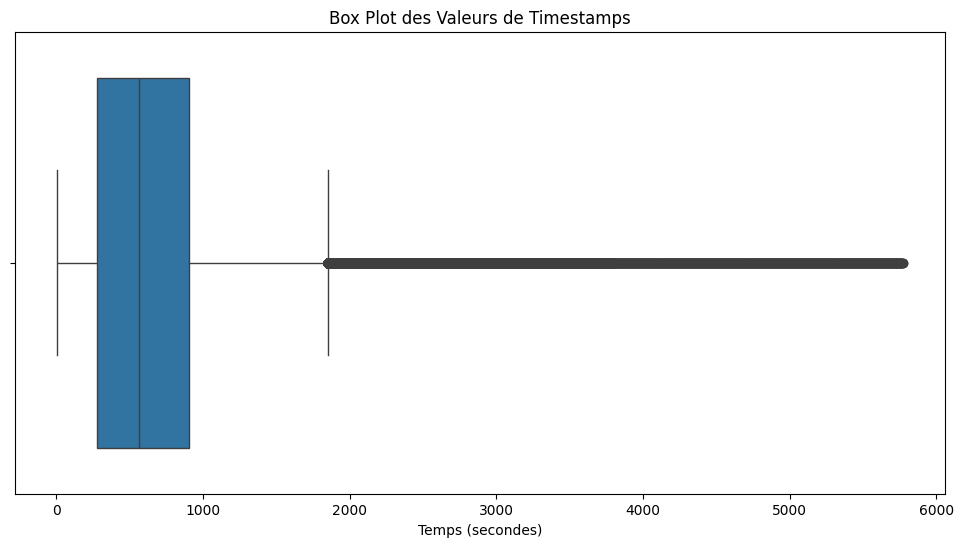

In [11]:
# Boxplot des timestamp pour visualiser les outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=timestamp_series)
plt.title('Box Plot des Valeurs de Timestamps')
plt.xlabel('Temps (secondes)')
plt.show()

Valeurs de timestamps >= 1850 :
15909     1850
15910     1855
15911     1860
15912     1865
15913     1870
          ... 
658631    2100
658632    2105
658633    2110
658634    2115
658635    2120
Length: 16025, dtype: int64
Plus grande valeur de timestamps : 5770

Nombre de valeurs de timestamps >= 1850 : 16025


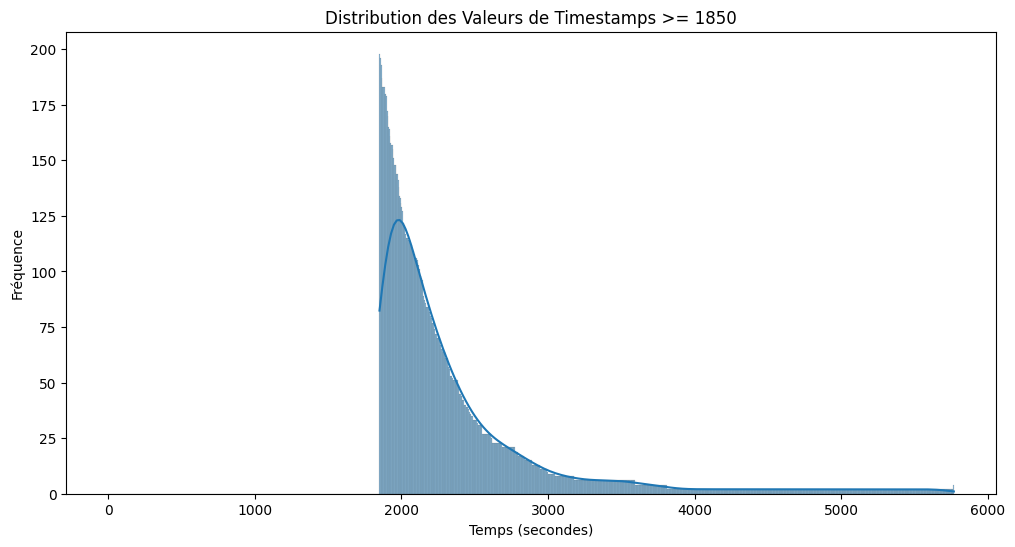

In [12]:
# See the tail in detail

# Filtrer les valeurs >= 1850
high_timestamps = timestamp_series[timestamp_series >= 1850]

# Afficher les résultats
print(f"Valeurs de timestamps >= 1850 :")
print(high_timestamps)

print(f"Plus grande valeur de timestamps :", np.sort(high_timestamps.unique())[-1])

# Optionnel : Afficher le nombre de valeurs filtrées
print(f"\nNombre de valeurs de timestamps >= 1850 : {len(high_timestamps)}")
bin_edges = np.arange(0, high_timestamps.max() + 5, 5)

plt.figure(figsize=(12, 6))
sns.histplot(data=high_timestamps, bins=bin_edges, kde=True)
plt.title('Distribution des Valeurs de Timestamps >= 1850')
plt.xlabel('Temps (secondes)')
plt.ylabel('Fréquence')
plt.show()

### Outliers

In [13]:
# Trouver les lignes sans timestamps

# Définir un seuil pour les parties anormales (par exemple, moins de 0 ou timestamps)
seuil_parties_anormales = 0

# Filtrer les parties anormales
parties_anormales = features_train[timestamp_counts <= seuil_parties_anormales]

# Afficher les 10 premières parties anormales
print(f"Affichage des {min(10, len(parties_anormales))} premières parties anormales (≤ {seuil_parties_anormales} timestamps):")
print(parties_anormales.head(10))

# Afficher le nombre total de parties anormales
print(f"\nNombre total de parties anormales : {len(parties_anormales)}")

# Optionnel : afficher les statistiques des parties anormales
print("\nStatistiques des parties anormales:")
print(timestamp_counts[timestamp_counts <= seuil_parties_anormales].describe())
print("-------------------------------------------------------")
print(features_train[timestamp_counts == 1]) # une seule ligne avec une timestamp: ligne 45

Affichage des 10 premières parties anormales (≤ 0 timestamps):
                                           battleneturl played_race     0  \
46    http://eu.battle.net/sc2/en/profile/3538115/1/...        Zerg  Base   
577   http://us.battle.net/sc2/en/profile/3202227/1/...        Zerg   NaN   
578   http://us.battle.net/sc2/en/profile/2553612/1/...     Protoss   NaN   
671   http://us.battle.net/sc2/en/profile/5376901/1/...        Zerg   NaN   
672   http://us.battle.net/sc2/en/profile/3985949/1/...      Terran   NaN   
678   http://us.battle.net/sc2/en/profile/4589387/1/...        Zerg   NaN   
679   http://us.battle.net/sc2/en/profile/3985949/1/...      Terran   NaN   
1883  http://us.battle.net/sc2/en/profile/3949344/1/...      Terran   NaN   
1884  http://us.battle.net/sc2/en/profile/3650249/1/...     Protoss   NaN   
3011  http://xx.battle.net/sc2/en/profile/401/1/Soul...        Zerg     s   

        1    2     3         4         5    6         7  ... 10527 10528  \
46      s    

In [14]:
# Sélectionner la ligne d'indice 45
row = features_train.iloc[45]

# Trouver la colonne contenant une valeur txx
timestamp_column = next((col for col, val in row.items() if isinstance(val, str) and val.startswith('t')), None)

if timestamp_column:
    print(f"Colonne contenant le timestamp : {timestamp_column}")
    print(f"Valeur du timestamp : {row[timestamp_column]}")
else:
    print("Aucune colonne contenant un timestamp trouvée dans cette ligne.")

Colonne contenant le timestamp : 13
Valeur du timestamp : t5


### Remove outliers

In [15]:
from typing import List
import pandas as pd

def check_timestamps(actions: List[str]) -> bool:
    """
    Vérifie si la séquence de timestamps dans les actions est valide.
    
    Critères de validité :
    - Doit commencer par t5
    - Doit s'incrémenter de 5 à chaque fois (t5, t10, t15, etc.)
    - Le dernier timestamp doit être entre 250 et 4000
    
    Args:
        actions: Liste d'actions incluant les timestamps
        
    Returns:
        bool: True si la séquence est valide, False sinon
    """
    timestamps = [action for action in actions if isinstance(action, str) and action.startswith('t')]
    
    if not timestamps or timestamps[0] != 't5':
        return False
    
    for i in range(1, len(timestamps)):
        prev_time = int(timestamps[i-1][1:])
        curr_time = int(timestamps[i][1:])
        if curr_time != prev_time + 5:
            return False
    
    last_time = int(timestamps[-1][1:])
    return 5 <= last_time <= 5770 # old =[250, 4000], highest timestamp = 5770 , boxplot 1850

def validate_game_sequence(row):
    """Valide une séquence de jeu unique du DataFrame"""
    actions = [x for x in row if pd.notna(x)]
    return check_timestamps(actions)

# Application au DataFrame train
valid_sequences_train = features_train.apply(validate_game_sequence, axis=1)
print(f"Séquences valides train: {valid_sequences_train.sum()}/{len(features_train)} ({valid_sequences_train.mean()*100:.2f}%)")

# Affichage des séquences invalides
invalid_sequences_train = features_train[~valid_sequences_train]
print("---------------------------------------------------------------------")
# print("sequences invalides: ")
# print(invalid_sequences)

Séquences valides train: 3042/3052 (99.67%)
---------------------------------------------------------------------


In [16]:
# Remove lines with no timestamps and also extremes players

from typing import List
import pandas as pd

def check_timestamps(actions: List[str]) -> bool:
    """
    Vérifie si la séquence de timestamps dans les actions est valide.
    
    Critères de validité :
    - Doit commencer par t5
    - Doit s'incrémenter de 5 à chaque fois (t5, t10, t15, etc.)
    - Le dernier timestamp doit être entre 250 et 4000
    
    Args:
        actions: Liste d'actions incluant les timestamps
        
    Returns:
        bool: True si la séquence est valide, False sinon
    """
    timestamps = [action for action in actions if isinstance(action, str) and action.startswith('t')]
    
    if not timestamps or timestamps[0] != 't5':
        return False
    
    for i in range(1, len(timestamps)):
        prev_time = int(timestamps[i-1][1:])
        curr_time = int(timestamps[i][1:])
        if curr_time != prev_time + 5:
            return False
    
    last_time = int(timestamps[-1][1:])
    return 5 <= last_time <= 5770  # take them all

def validate_game_sequence(row):
    """Valide une séquence de jeu unique du DataFrame"""
    actions = [x for x in row if pd.notna(x)]
    return check_timestamps(actions)

# Application au DataFrame train
valid_sequences_train = features_train.apply(validate_game_sequence, axis=1)
print(f"Séquences valides train: {valid_sequences_train.sum()}/{len(features_train)} ({valid_sequences_train.mean()*100:.2f}%)")

# Affichage des séquences invalides
invalid_sequences_train = features_train[~valid_sequences_train]
print("---------------------------------------------------------------------")

# Identifier les joueurs ayant joué plus de 40 parties
player_counts = features_train['battleneturl'].value_counts()
extreme_players = player_counts[player_counts >= 40].index.tolist()

# Suppression des joueurs extrêmes
features_train_cleaned = features_train[~features_train['battleneturl'].isin(extreme_players)]

print(f"Nombre de joueurs extrêmes supprimés : {len(extreme_players)}")
print(f"Nouveau nombre total de parties après suppression : {len(features_train_cleaned)}")

Séquences valides train: 3042/3052 (99.67%)
---------------------------------------------------------------------
Nombre de joueurs extrêmes supprimés : 6
Nouveau nombre total de parties après suppression : 2767


In [17]:
# Apply cleaning
cleaned_features_train = features_train[valid_sequences_train]
# features_train_cleaned = features_train[valid_sequences_train & ~features_train['battleneturl'].isin(extreme_players)]
print("\nDataFrame nettoyé (lignes valides) :")
print(cleaned_features_train.head())
print(cleaned_features_train.shape)


DataFrame nettoyé (lignes valides) :
                                        battleneturl played_race     0     1  \
0  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
1  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss     s  Base   
2  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   
3  http://eu.battle.net/sc2/en/profile/3074362/1/...     Protoss  Base     s   
4  http://eu.battle.net/sc2/en/profile/4234852/1/...     Protoss  Base     s   

   2     3     4  5         6         7  ... 10527 10528 10529 10530 10531  \
0  s     s     s  s        t5      Base  ...   NaN   NaN   NaN   NaN   NaN   
1  s     s  Base  s         s      Base  ...   NaN   NaN   NaN   NaN   NaN   
2  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   
3  s  Base     s  s         s        t5  ...   NaN   NaN   NaN   NaN   NaN   
4  s     s  Base  s  hotkey30  hotkey00  ...   NaN   NaN   NaN   NaN   NaN   

  10532 1053

### Getting features... - Given code

Building a mini framework to read our Dataframe and convert it to features.

Now we will create features out of the dataset.

FeaturesGetter iterates over an ActionsDataLoader (yield every actions between two 't[xx]') and apply a set of Feature contained in a FeaturePool. At the end, it gets metrics over the values registered by each features in the feature pool.

In [18]:
class CancelBatchException(Exception):
    """Used to cancel processing of a batch of data (when the keystroke sequence is fully read)"""

In [19]:
class Feature:
    def __init__(
        self, name: str, 
        lambda_: Callable[[List[str]], Union[int, float]]=None, 
        val_count: int=None, 
        max_iter: int=None, 
        predicate: Callable[[List[str]], bool]=None, 
        metric: Callable[[List[str]], Union[int, float]]=mean, 
        div: bool=True
    ):
        """If neither lambda_, val_count nor predicate are defined, the _lambda will just be the length of the given action range.

        Args:
            name (str): feature name
            lambda_ (Callable[[List[str]], Union[int, float]], optional): 
                lambda that'll be applied to compute metric value over action ranges. Defaults to None.
            val_count (int, optional): set feature's lambda to be the count of this value (if lambda_ is None). Defaults to None.
            max_iter (int, optional): when exceeding this iteration, the feature will no longer be computed. Defaults to None.
            predicate (Callable[[List[str]], bool], optional): define a predicate to compute lambda across one 
                action range (if lambda_ and val_count is None). Defaults to None.
            metric (Callable[[List[str]], Union[int, float]], optional): the metric used to aggregate feature's 
                values across all ranges. Defaults to mean.
            div (bool, optional): whether to divide the aggregated metric value. Defaults to True.
        """
        self.name, self.metric, self.max_iter, self.div = name, metric, max_iter, div
        self.reset()
        self._lambda: Callable[[List[str]], Union[int, float]]
        if   lambda_   is not None: 
            self._lambda = lambda_
        elif val_count is not None: 
            self._lambda = lambda x: x.count(val_count)
        elif predicate is not None: 
            self._lambda = lambda x: sum(1 for o in x if predicate(o))
        else: 
            self._lambda = lambda x: len(x)
    
    def reset(self):
        """Resets the value of the feature
        """
        self.vals: List[Union[int, float]] = []
        self.val, self.i = 0, 0
        
    def __call__(self, rng: List[str], *args):
        """Compute feature's value according to _lambda, for given action range. Extra *args are given to _lambda

        Args:
            rng (List[str]): range of action (given by ActionDataLoader)
        """
        if self.max_iter is None or self.i < self.max_iter:
            self.val = self._lambda(rng, *args)
            self.vals.append(self.val)
            self.i += 1
            
    @property
    def value(self) -> int | float:
        """Returns:
            int | float: the aggregated feature's value across all action ranges read until now
        """
        return self.metric(self.vals)

In [20]:
class ActionsDataLoader:
    """Iterates over two 'tXX', yielding actions between each time steps
    """
    def __init__(self, actions: pd.DataFrame, do_range: bool = True, max_t: Optional[int]=None):
        """Args:
            actions (List[Feature]): The raw dataframe
            do_range (bool): whether the data loader should iterate and yield each range 
                between two 'tXX', or just yield the whole sequence once then return. Defaults to True.
            max_t (Optional[int], optional): the t max to stop yielding. Defaults to None.
        """
        self.t_indx = [0] + [j for j, val in enumerate(actions) if isinstance(val, str) and val[0] == "t"]
        self.do_range = do_range
        if max_t and max_t < len(self.t_indx):
            self.t_indx = self.t_indx[:max_t]
            self.values = actions.values[: self.t_indx[max_t - 1]]
        else: 
            self.values = actions.values
        self.n_t = len(self.t_indx)
    
    def __len__(self): return 1 if self.do_range else (self.n_t or 1)
    
    def __iter__(self):
        if self.n_t == 0 or not self.do_range:
            self.start_indx = 0
            self.end_indx = self._get_first_nan_indx()
            yield self.values[self.start_indx:self.end_indx].tolist()
            return 
        for self.i in range(self.n_t):
            try:
                self._get_actions_range()
                yield self.values[self.start_indx:self.end_indx].tolist()
            except CancelBatchException: 
                return

    def _get_actions_range(self):
        """Computes the action range until a 'tXX' is met. If there are no more 'tXX', 
            it means we reached the end of the game, and the sequences finish with NaN 
            (or for the longest game, the full row is read).

        Raises:
            CancelBatchException: indicates that there is no more action to be read (next action is NaN).
        """
        self.start_indx = self.t_indx[self.i] + (1 if self.i >0 else 0)
        if  self.start_indx >= len(self.values) or pd.isna(self.values[self.start_indx]): 
            raise CancelBatchException
        self.end_indx = self.t_indx[self.i + 1] if (self.i + 1) < self.n_t else self._get_first_nan_indx()
    
    def _get_first_nan_indx(self) -> int:
        """Returns:
            int: the first index in values that is not NaN
        """
        nans = np.argwhere(pd.isna(self.values[self.start_indx:]))
        return len(self.values) if len(nans) == 0 else nans[0][0]
    
    def get_max_t(self):
        """Gets the last 'tXX' defined. If this data loader was defined with max_t not None, it returns this max_t
        """
        if self.n_t - 1 == 0:
            return 0
        return int(self.values[self.t_indx[self.n_t - 1]][1:]) if self.n_t > 0 else 0

In [21]:
class FeaturesGetter:
    def __init__(self, features: List[Feature], n_rows: int=3052, log: bool=False, **kwargs_dataloader):
        """Args:
            features (List[Feature]): the list of features to compute
            n_rows (int, optional): the number of row (used only in log). Defaults to 3052.
            log (bool, optional): whether to output log information when processing the df. Defaults to False.

            Accepts extra kwargs_dataloader that'll be passed to the dataloader
        """
        self.feature_pool, self.n_rows, self.log, self.kwargs_dataloader = features, n_rows, log, kwargs_dataloader
        self.game_l: int # game length
        self.reset()
        
    def reset(self):
        """Resets the value of each feature in the feature pool"""
        for feature in self.feature_pool: 
            feature.reset()
        self.game_l = 0
    
    def _log(self):
        """Print to stdout the current % of the df that have been processed"""
        global cnt
        cnt += 1
        print(f"{cnt * 100 / self.n_rows:.2f} %", end="\r")
    
    def _one_update(self):
        """Compute each feature's value for one batch (one action range yielded by the ActionDataLoader)"""
        for feature in self.feature_pool: 
            feature(self.actions_rng)
        
    def __call__(self, actions: pd.DataFrame) -> pd.Series:
        """Computes all features' values for each of the given actions, iterating over ADL with parameters defined in __init__
        
        Returns:
            pd.Series: the features' values as a Series. 
                Adds an extra feature which is the game length is max_t is not in __init__ kwargs
        """
        self.reset()
        if self.log:
            self._log()
        adl = ActionsDataLoader(actions, **self.kwargs_dataloader)
        for self.actions_rng in adl:
            self._one_update()
        activs = [f.value / len(adl) if f.div else f.value for f in self.feature_pool]
        self.game_l = (max_t := self.kwargs_dataloader.get("max_t", None)) or adl.get_max_t()
        return pd.Series( activs + ([self.game_l] if max_t is None else []) )

### Our features

In [ ]:
### Features v3

FEATURES_NAMES = ["s_mean", "base_mean", "mineral_mean", "hotkeys_mean", "actions_mean"]
ACTIONS = [ "s", "Base", "SingleMineral", "hotkey" ]

from itertools import product
from collections import Counter
import numpy as np

def get_features() -> List[Feature]:
    """Defines base features and additional features to better identify players"""
    features = []
    
    # Base features
    for i, action in enumerate(ACTIONS[:-1]):
        features.append(Feature(FEATURES_NAMES[i], val_count=action))
    features.append(Feature(FEATURES_NAMES[-2], predicate=lambda x: x.startswith(ACTIONS[-1]))) # hotkeys
    features.append(Feature(FEATURES_NAMES[-1]))
    
    
    # Hotkey usage ratio
    features.append(Feature("hotkey_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('hotkey')) / len(x) if x else 0, div=False))
    features.append(Feature("Base_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('Base')) / len(x) if x else 0, div=False))
    features.append(Feature("s_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('s')) / len(x) if x else 0, div=False))
    features.append(Feature("mineral_ratio", lambda x: sum(1 for action in x if isinstance(action, str) and action.startswith('SingleMineral')) / len(x) if x else 0, div=False))
    
    
    # Action variety
    features.append(Feature("action_variety", lambda x: len(set(x)) / len(x) if x else 0, div=False))
    
    # Hotkey vs Normal actions ratio
    def normal_hotkey_ratio(x):
        if not x:
            return 0
        hotkeys = sum(1 for action in x if isinstance(action, str) and action.startswith('hotkey'))
        normal = normal = sum(1 for action in x if isinstance(action, str) and action in ['Base', 'SingleMineral', 's'])
        return hotkeys / (normal + 1e-5)
    features.append(Feature("normal_hotkey_ratio", normal_hotkey_ratio, div=False))
    
    # Action change frequency
    def action_change_frequency(x):
        if not x:
            return 0
        changes = sum(1 for i in range(1, len(x)) if x[i] != x[i-1])
        return changes / len(x)
    features.append(Feature("action_change_frequency", action_change_frequency, div=False))
    
    # Specific hotkey usage
    for i in range(10):
        features.append(Feature(f"hotkey{i}_usage", lambda x, i=i: sum(1 for action in x if isinstance(action, str) and action.startswith(f'hotkey{i}'))))
    
    
    # Hotkey usage, every combinaison
    for digit in range(10):
        for value in range(3):  # 0=created, 1=updated, 2=used
        # for value in [0, 2]:# exclude 1=updated    
            def hotkey_digit_value_ratio(x, digit=digit, value=value):
                if not x:
                    return 0
                hotkeys = [action for action in x if isinstance(action, str) and action.startswith('hotkey')]
                count = sum(1 for hotkey in hotkeys if int(hotkey[-2]) == digit and int(hotkey[-1]) == value)
                return count / len(hotkeys) if hotkeys else 0
            features.append(Feature(f"hotkey{digit}_value{value}_ratio", hotkey_digit_value_ratio, div=False))
    
    # hotkeys evolution
    # Si ce ratio est élevé → Joueur rapide en début de partie, plus lent après.
    features.append(Feature(
    "early_vs_late_hotkeys",
    lambda x: (sum(1 for i in x[:len(x)//2] if "hotkey" in i) + 1) / 
            (sum(1 for i in x[len(x)//2:] if "hotkey" in i) + 1),
    div=False
    ))
    
    # actions evolution
    # Permet de voir si un joueur accélère ou ralentit en fin de partie.
    features.append(Feature(
        "action_growth_rate",
        lambda x: len(x[len(x)//2:]) / (len(x[:len(x)//2]) + 1e-5),
        div=False
    ))
    
    # Répétition
    # Un bon joueur varie ses actions, un joueur amateur répète souvent les mêmes actions.
    def repetition_ratio(x):
        if not x:
            return 0
        counts = Counter(x)
        most_common = counts.most_common(1)[0][1]  # Nombre d’occurrences de l’action la plus répétée
        return most_common / len(x)

    features.append(Feature("repetition_ratio", repetition_ratio, div=False))
    
    # Diversité séance d'actions
    def unique_action_sequences(x, n=3):
        if len(x) < n:
            return 0
        sequences = set(tuple(x[i:i+n]) for i in range(len(x) - n + 1))
        return len(sequences) / (len(x) - n + 1)

    features.append(Feature("sequence_diversity", unique_action_sequences, div=False))
    
    return features


### Compute features

In [23]:
features_getter = None
def create_features(
    df: pd.DataFrame, 
    min_: int, 
    max_: int, 
    drop: bool=False, 
    features: List[Feature]=get_features(), 
    **kwargs
) -> pd.DataFrame:
    """Compute features on given dataframe

    Args:
        df (pd.DataFrame)
        min_ (int): index of the first action to pass to the feature
        max_ (int): index of the last action to pass to the feature
        drop (bool, optional): whether to drop original columns of the dataframe. Defaults to False.
        features (List[Feature], optional). Defaults to get_base_features().

    Returns:
        pd.DataFrame: a dataframe containing features' values for each row
    """
    global features_getter
    features_getter = FeaturesGetter(features, **kwargs)
    final_df = df.loc[:,min_:max_].apply(features_getter, axis=1, result_type='expand')
    final_df.columns = [f.name for f in features_getter.feature_pool] + (["max_time"] if not kwargs.get("max_t") else [])
    if drop:
        df = df.drop(columns=[i for i in range(min_, max_ + 1)])
    final_df = pd.concat([df, final_df], axis=1)
    features_getter.reset()
    return final_df

### Handling string - Given code
The race_played column can only take three values; instead of converting it to categorical as we did with our dependent variable, we will instead convert it to dummy variables: we one-hot encode each race. It will not add many columns to our dataframe (only three) but will allow the decision trees to split much faster on the race (on only one binary split).

In [24]:
def get_dummies(df: pd.DataFrame):
    """Converts textual columns to one-hot encoded vectors (one column per possible value)"""
    df = pd.get_dummies(df, columns=["played_race"])
    return df

### Convert battle net url to number
Given code slightly modified to keep old values

In [25]:
def to_categories(df: pd.DataFrame, col: str="battleneturl") -> dict:
    """Convert col of df to a categorical column"""
    df["battleneturl"] = pd.Categorical(df["battleneturl"])
    code_to_url = dict(enumerate(df[col].cat.categories))
    df[[col]] = df[[col]].apply(lambda x: x.cat.codes)
    return code_to_url

### Preprocessing

In [26]:
def preprocess(df: pd.DataFrame, min_: int, max_: int, is_train: bool=True, convert_race: bool=True, **kwargs):
    """Calls FeatureGetter on the dataframe, applying preprocessing steps before
    Args:
        df (pd.DataFrame)
        min_ (int)
        max_ (int)
        is_train (bool, optional): whether the current dataframe contains training data 
            (to preprocess dependent variable or not). Defaults to True.
        convert_race (bool, optional): whether to convert race attribute to dummies. Defaults to True.

    Returns:
        _type_: _description_
    """
    df = create_features(df, min_, max_, **kwargs)
    if convert_race: 
        df = get_dummies(df)
    df.columns = df.columns.astype(str)
    if is_train:
        url_code_matching = to_categories(df)
        return (df, url_code_matching)
    return df

In [27]:
%%time
cnt=0
(processed_train_df, url_code_matching) = preprocess(cleaned_features_train, 0, cleaned_features_train.shape[1]-3, drop=True, n_rows=3042, log=True)#2846 
processed_train_df.head()

CPU times: total: 2min
Wall time: 2min 13s


,battleneturl,s_mean,base_mean,mineral_mean,hotkeys_mean,actions_mean,hotkey_ratio,Base_ratio,s_ratio,mineral_ratio,...,hotkey9_value1_ratio,hotkey9_value2_ratio,early_vs_late_hotkeys,action_growth_rate,repetition_ratio,sequence_diversity,max_time,played_race_Protoss,played_race_Terran,played_race_Zerg
0,53,2.036254,0.199396,0.015106,4.492447,6.743202,0.660472,0.017780,0.283678,0.001816,...,0.0,0.000000,0.968326,3022.275938,0.423269,0.792350,1655.0,True,False,False
1,29,1.620482,0.036145,0.000000,4.596386,6.253012,0.709817,0.005881,0.260205,0.000000,...,0.0,0.010874,0.978837,904.813807,0.434565,0.852135,1655.0,True,False,False
2,53,2.128713,0.232673,0.014851,4.297030,6.673267,0.647709,0.022472,0.298835,0.001281,...,0.0,0.002063,0.962467,2476.389269,0.434237,0.750487,1010.0,True,False,False
3,29,1.965347,0.103960,0.000000,4.787129,6.856436,0.699131,0.013035,0.282883,0.000000,...,0.0,0.014299,0.942209,1486.341591,0.447292,0.854211,1005.0,True,False,False
4,53,1.925926,0.018519,0.000000,3.787037,5.731481,0.669150,0.002315,0.310016,0.000000,...,0.0,0.000000,0.863176,6482.600252,0.487461,0.697182,540.0,True,False,False


In [28]:
processed_train_df.shape

(3042, 61)

In [29]:
%%time
cnt=0
processed_test_df = preprocess(features_test, 0, features_test.shape[1]-3, is_train=False, drop=True, n_rows=340, log=True)

print("after process")
processed_test_df.head()

after process
CPU times: total: 13.7 s
Wall time: 15.4 s


,6816,s_mean,base_mean,mineral_mean,hotkeys_mean,actions_mean,hotkey_ratio,Base_ratio,s_ratio,mineral_ratio,...,hotkey9_value1_ratio,hotkey9_value2_ratio,early_vs_late_hotkeys,action_growth_rate,repetition_ratio,sequence_diversity,max_time,played_race_Protoss,played_race_Terran,played_race_Zerg
0,NaN,4.784091,0.107955,0.017045,13.585227,18.494318,0.716101,0.006326,0.265592,0.000618,...,0.0,0.014125,1.013846,1.049972,0.394768,0.670974,875.0,False,False,True
1,NaN,2.868687,0.000000,0.000000,8.277778,11.146465,0.664641,0.000000,0.320207,0.000000,...,0.0,0.035519,1.027854,1516.270869,0.453478,0.741815,985.0,False,True,False
2,NaN,2.297521,0.082645,0.000000,12.070248,14.450413,0.818070,0.005846,0.176084,0.000000,...,0.0,0.000000,0.959811,1.085088,0.373160,0.760857,1210.0,True,False,False
3,NaN,5.401361,0.057823,0.006803,4.785714,10.251701,0.452230,0.006206,0.520448,0.000709,...,0.0,0.000000,1.081105,1701.797953,0.568508,0.704430,1470.0,False,False,True
4,NaN,1.787879,0.159091,0.000000,2.083333,4.030303,0.526587,0.032363,0.395595,0.000000,...,0.0,0.000000,0.896465,12122.286799,0.556165,0.633944,660.0,True,False,False


In [30]:
## Drop columns
# processed_train_df = processed_train_df.drop(columns=['max_time', 'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg', 'mineral_ratio'])
# processed_test_df = processed_test_df.drop(columns=['max_time', 'played_race_Protoss', 'played_race_Terran', 'played_race_Zerg', 'mineral_ratio'])
# processed_train_df = processed_train_df.drop(columns=['hotkey9_value0_ratio', 'hotkey9_value2_ratio'])
# processed_test_df = processed_test_df.drop(columns=['hotkey9_value0_ratio', 'hotkey9_value2_ratio'])

### data split

In [31]:
from sklearn.model_selection import train_test_split 

X = processed_train_df.drop(columns=['battleneturl'])
y = processed_train_df['battleneturl']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

### Grid search

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split 
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



In [ ]:
# Fine Tuning pour random forest
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
param_grid = { 
	'n_estimators': [100, 150, 200, 300], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [10, 25, 30, 50, 60]
} 

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=skf,  # Validation croisée préserve la proportion des classes 
    n_jobs=-1,  # Utilise tous les cœurs du processeur
    verbose=2  # Affiche la progression du GridSearch
)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [ ]:
# Fine Tuning pour Adaboost
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

param_grid = { 
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1, 0.3, 0.7],
    'estimator__max_depth': [5, 10, 15, 30],
    'estimator__max_features': ['sqrt', 'log2', None]
}

base_estimator = DecisionTreeClassifier(random_state=32)
adaboost = AdaBoostClassifier(estimator = base_estimator, algorithm='SAMME', random_state=32)

grid_search = GridSearchCV(
    adaboost,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=skf,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

### Training

In [58]:
# from sklearn import metrics
from sklearn.metrics import f1_score

decision_tree = DecisionTreeClassifier(random_state=32, max_depth=15, max_features='sqrt')

def train_model(X_train, y_train):
    # model = RandomForestClassifier(n_estimators=200, max_depth=50, max_features='log2', random_state=42)
    
    model = AdaBoostClassifier( estimator = decision_tree, algorithm='SAMME',  n_estimators=200, learning_rate=0.1, random_state=52)
    
    model.fit(X_train, y_train)
    return model

def make_predictions(model, X):
    return model.predict(X)

def calculate_f1_score(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted')


In [59]:
# Entraîner le modèle
model = train_model(X_train, y_train)

### Validation of training

In [60]:
# Faire des prédictions sur l'ensemble de validation
val_predictions = make_predictions(model, X_val)

# Calculer le F1-score sur l'ensemble de validation
f1 = calculate_f1_score(y_val, val_predictions)
print(f"F1-score sur l'ensemble de validation : {f1:.3f}")

F1-score sur l'ensemble de validation : 0.898


### Features importance

In [61]:
# Features importance
feature_names = X.columns.to_list()
print(feature_names)

importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 


['s_mean', 'base_mean', 'mineral_mean', 'hotkeys_mean', 'actions_mean', 'hotkey_ratio', 'Base_ratio', 's_ratio', 'mineral_ratio', 'action_variety', 'normal_hotkey_ratio', 'action_change_frequency', 'hotkey0_usage', 'hotkey1_usage', 'hotkey2_usage', 'hotkey3_usage', 'hotkey4_usage', 'hotkey5_usage', 'hotkey6_usage', 'hotkey7_usage', 'hotkey8_usage', 'hotkey9_usage', 'hotkey0_value0_ratio', 'hotkey0_value1_ratio', 'hotkey0_value2_ratio', 'hotkey1_value0_ratio', 'hotkey1_value1_ratio', 'hotkey1_value2_ratio', 'hotkey2_value0_ratio', 'hotkey2_value1_ratio', 'hotkey2_value2_ratio', 'hotkey3_value0_ratio', 'hotkey3_value1_ratio', 'hotkey3_value2_ratio', 'hotkey4_value0_ratio', 'hotkey4_value1_ratio', 'hotkey4_value2_ratio', 'hotkey5_value0_ratio', 'hotkey5_value1_ratio', 'hotkey5_value2_ratio', 'hotkey6_value0_ratio', 'hotkey6_value1_ratio', 'hotkey6_value2_ratio', 'hotkey7_value0_ratio', 'hotkey7_value1_ratio', 'hotkey7_value2_ratio', 'hotkey8_value0_ratio', 'hotkey8_value1_ratio', 'hotkey8

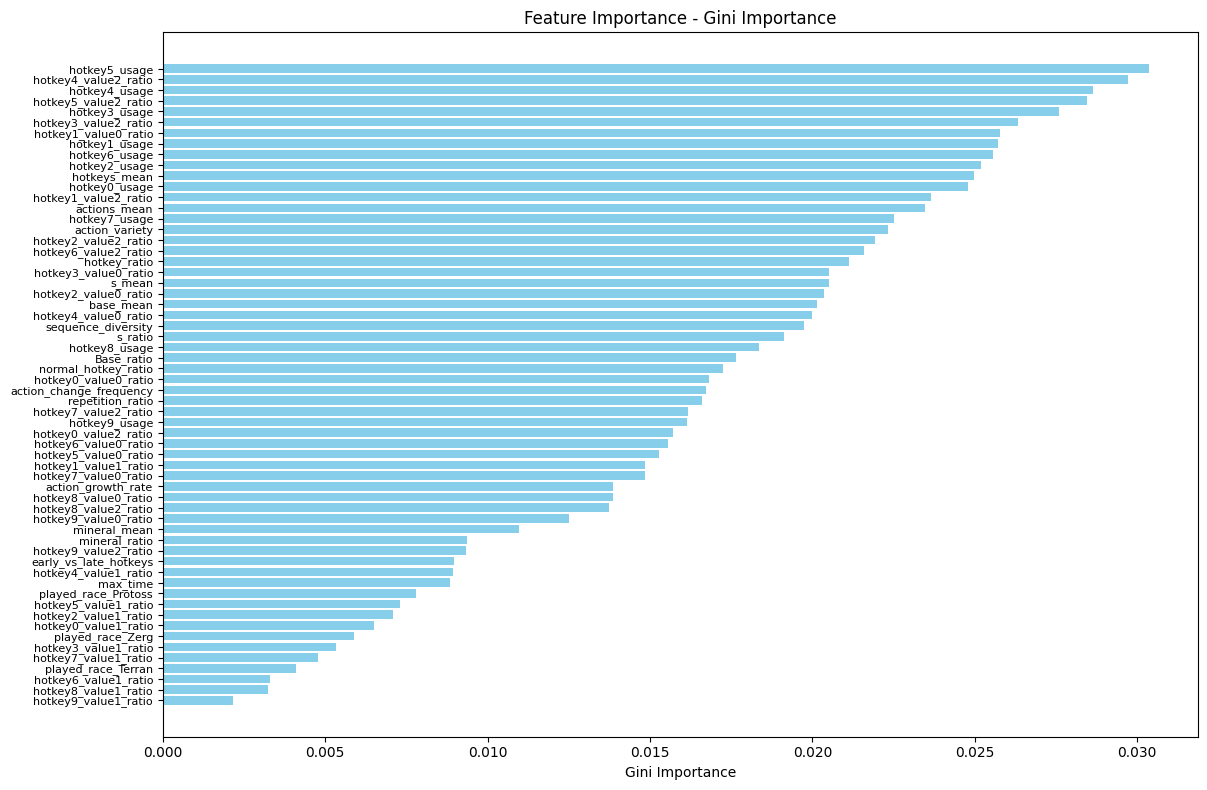

In [62]:
import matplotlib.pyplot as plt

sorted_idx = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

plt.figure(figsize=(15, 8))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')

# Ajuste la taille des labels pour les rendre lisibles
plt.yticks(fontsize=8)  # Réduit la taille de la police des labels si nécessaire
plt.gca().invert_yaxis()  # Inverse l'axe des y pour une meilleure visualisation

plt.tight_layout()
plt.subplots_adjust(left=0.3)  # Ajoute de l'espace à gauche pour les labels
plt.show()

### Save for submission

In [63]:
test_df = processed_test_df.drop(columns=[processed_test_df.columns[0], '6816'])

test_predictions = make_predictions(model, test_df)

# Convertir les codes prédits en URLs
url_predictions = [url_code_matching[code] for code in test_predictions]

# Créer un DataFrame pour sauvegarder les résultats
results_df = pd.DataFrame({
    'RowId': range(1, len(url_predictions) + 1),
    'prediction': url_predictions
})

results_df.to_csv('predictions.csv', index=False)
print("Les prédictions ont été sauvegardées dans 'predictions.csv'.")

Les prédictions ont été sauvegardées dans 'predictions.csv'.
